# Glassdoor Review Analysis

### By: Muhammad Soban Amir
---

Dataset Source: https://www.kaggle.com/datasets/davidgauthier/glassdoor-job-reviews/data

In [1]:
%config Completer.use_jedi = False
!pip install termcolor

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib notebook
from termcolor import colored

In [3]:
glassdoor_data = pd.read_csv("glassdoor_reviews.csv")

In [4]:
print(glassdoor_data)

                         firm date_review                         job_title  \
0       AFH-Wealth-Management  2015-04-05                                     
1       AFH-Wealth-Management  2015-12-11              Office Administrator   
2       AFH-Wealth-Management  2016-01-28              Office Administrator   
3       AFH-Wealth-Management  2016-04-16                                     
4       AFH-Wealth-Management  2016-04-23              Office Administrator   
...                       ...         ...                               ...   
838561         the-LEGO-Group  2021-06-02                 Marketing Manager   
838562         the-LEGO-Group  2021-06-03                   Sales Associate   
838563         the-LEGO-Group  2021-06-03                        Strategist   
838564         the-LEGO-Group  2021-06-04   Customer Service Representative   
838565         the-LEGO-Group  2021-06-04        Human Resources Specialist   

                                    current  \
0   

In [5]:
print(glassdoor_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838566 entries, 0 to 838565
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   firm                 838566 non-null  object 
 1   date_review          838566 non-null  object 
 2   job_title            838566 non-null  object 
 3   current              838566 non-null  object 
 4   location             541223 non-null  object 
 5   overall_rating       838566 non-null  int64  
 6   work_life_balance    688672 non-null  float64
 7   culture_values       647193 non-null  float64
 8   diversity_inclusion  136066 non-null  float64
 9   career_opp           691065 non-null  float64
 10  comp_benefits        688484 non-null  float64
 11  senior_mgmt          682690 non-null  float64
 12  recommend            838566 non-null  object 
 13  ceo_approv           838566 non-null  object 
 14  outlook              838566 non-null  object 
 15  headline         

In [6]:
print(glassdoor_data.describe())

       overall_rating  work_life_balance  culture_values  diversity_inclusion  \
count   838566.000000      688672.000000   647193.000000        136066.000000   
mean         3.655956           3.375735        3.590164             3.966612   
std          1.174684           1.305874        1.323280             1.190937   
min          1.000000           1.000000        1.000000             1.000000   
25%          3.000000           2.000000        3.000000             3.000000   
50%          4.000000           4.000000        4.000000             4.000000   
75%          5.000000           4.000000        5.000000             5.000000   
max          5.000000           5.000000        5.000000             5.000000   

          career_opp  comp_benefits    senior_mgmt  
count  691065.000000  688484.000000  682690.000000  
mean        3.461825       3.398109       3.176576  
std         1.271295       1.218738       1.330720  
min         1.000000       1.000000       1.000000  
25%  

In [7]:
#taking a subset of dataframe
companies = ['the-LEGO-Group', 'Apple', 'Google', 'Microsoft', 'Facebook']

tech_glassdoor_reviews = glassdoor_data[glassdoor_data['firm'].isin(companies)]

print('Rows:', len(tech_glassdoor_reviews))

Rows: 64645


In [8]:
#data cleaning

# Remove leading and trailing whitespaces from all columns
tech_glassdoor_reviews_cleaned = tech_glassdoor_reviews.applymap(lambda x: x.strip() if isinstance(x, str) else x)


# removing rows with null values
tech_glassdoor_reviews_cleaned = tech_glassdoor_reviews_cleaned[(tech_glassdoor_reviews_cleaned['job_title'] != '')  & ((tech_glassdoor_reviews_cleaned['date_review'] != '') )] 

print('Rows:', len(tech_glassdoor_reviews_cleaned))

Rows: 57165


---
## Mean Rating per Year for Each Company
---

<IPython.core.display.Javascript object>


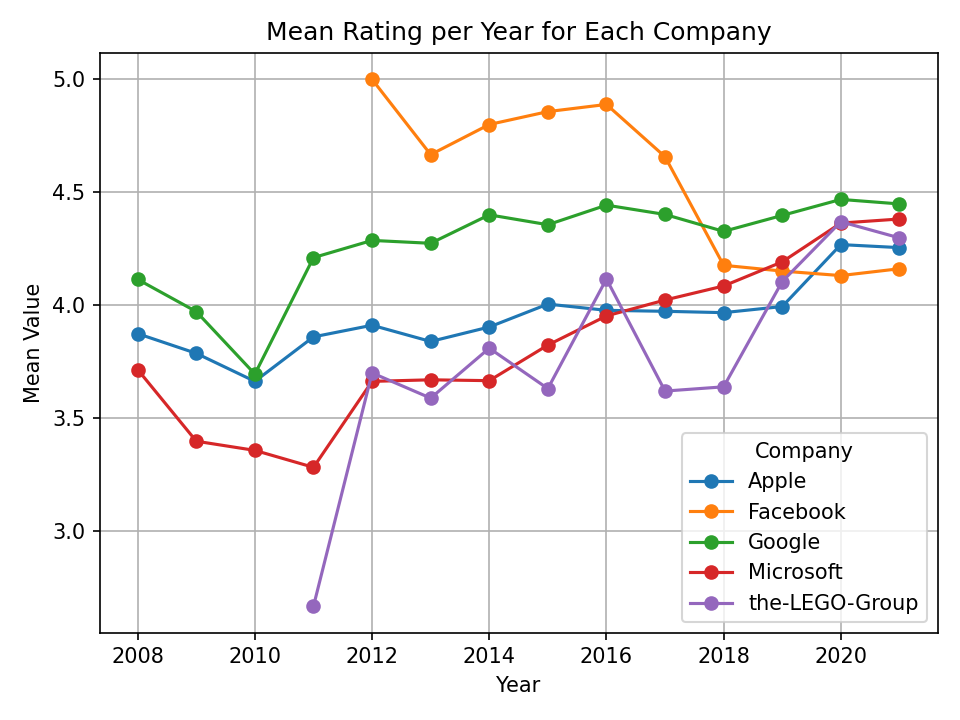

In [9]:

# Convert 'date_review' column to datetime type
tech_glassdoor_reviews_cleaned['date_review'] = pd.to_datetime(tech_glassdoor_reviews_cleaned['date_review'])

# Extract year from 'date_review' column
tech_glassdoor_reviews_cleaned['year'] = tech_glassdoor_reviews_cleaned['date_review'].dt.year

# Group by 'year' and 'firm' columns and calculate mean
mean_rating_per_year_company = tech_glassdoor_reviews_cleaned.groupby(['year', 'firm'])['overall_rating'].mean()

# Plotting
mean_rating_per_year_company.unstack().plot(kind='line', marker='o')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.title('Mean Rating per Year for Each Company')

# Displaying the plot
plt.legend(title='Company')
plt.grid(True)
plt.tight_layout()
plt.show()

---
## Number of Reviews for Each Company
---

<IPython.core.display.Javascript object>


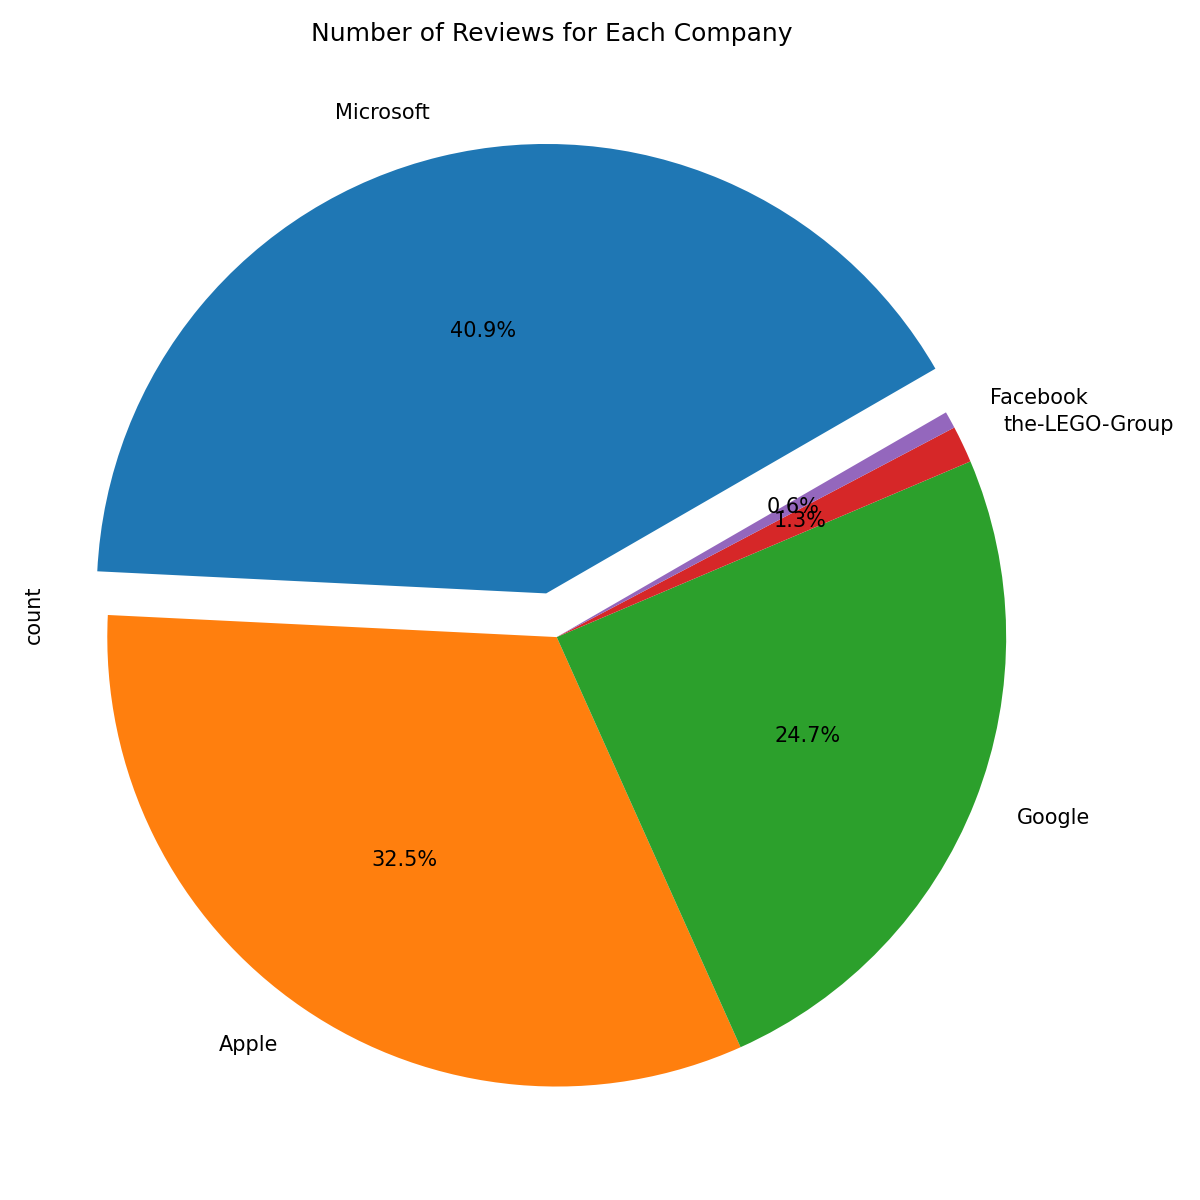

In [10]:
# Group by company and count the number of reviews
reviews_count = tech_glassdoor_reviews_cleaned['firm'].value_counts()

# Plotting
plt.figure(figsize=(8, 8))
reviews_count.plot(kind='pie', autopct='%1.1f%%', startangle=30, explode=[0.1,0,0,0,0], labeldistance=1.1)

# Adding title
plt.title('Number of Reviews for Each Company')

# Displaying the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

---
## Latest Lowest Rating Reviews for each Company 
---

In [11]:
# Find the index of the row with the latest lowest rating for each company
min_rating_index = tech_glassdoor_reviews_cleaned.sort_values(by='date_review', ascending=False).groupby(['firm'])['overall_rating'].idxmin()

# Get only latest comment per company
lowest_rating_comments = tech_glassdoor_reviews_cleaned.loc[min_rating_index, ['date_review', 'firm', 'job_title', 'overall_rating', 'headline', 'pros', 'cons']]

# Sort the comments by company name
lowest_rating_comments_sorted = lowest_rating_comments

# Print the comments with color-coding
for idx, row in lowest_rating_comments_sorted.iterrows():
    print(colored(f"Date: {row['date_review']} | Company: {row['firm']} | Job Title: {row['job_title']}", color='grey'))
    print(colored(f"Overall Rating: {row['overall_rating']}", color='blue'))
    print(colored(f"Headline: {row['headline']}", color='black'))
    print(colored(f"Pros: {row['pros']}", color='green'))
    print(colored(f"Cons: {row['cons']}", color='red'))
    print()  # Add an empty line between comments


Date: 2021-06-04 00:00:00 | Company: Apple | Job Title: Specialist
Overall Rating: 1
Headline: Apple experience as specialist
Pros: You meet a lot of people and they have processes in place to make the experience for the employee and customer optimal!
Cons: Saturday’s are required and involves a lot of inter psi all connecting that can time to time be draining.

Date: 2021-06-03 00:00:00 | Company: Facebook | Job Title: Programmer Analyst
Overall Rating: 1
Headline: WORST JOB EVER
Pros: Lots of free time! yay
Cons: Prefer twitter and instagram tbh

Date: 2021-06-03 00:00:00 | Company: Google | Job Title: Alphabet Innovator
Overall Rating: 1
Headline: Don't
Pros: None That I see So far
Cons: No connection to actual human beings

Date: 2021-05-29 00:00:00 | Company: Microsoft | Job Title: Principal Engineer
Overall Rating: 1
Headline: Azure is bad, please stay away from it
Pros: Nothing much I can think, very bad politics. 
Low pay, no WLB for nothing.
Cons: Very old mind set even though

---
## Recommendation Types by Company (Percentage of Total Reviews)
---

<IPython.core.display.Javascript object>


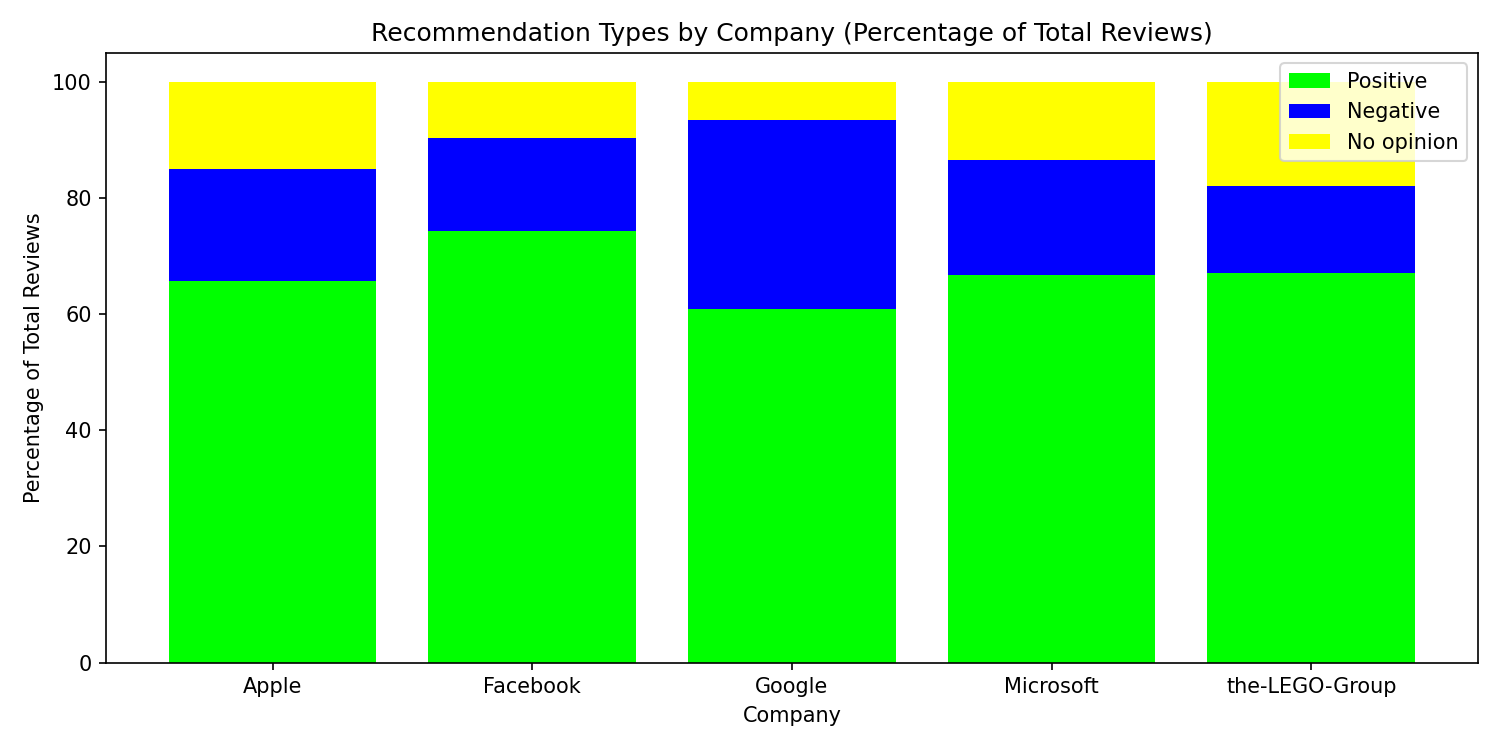

In [12]:
# Group by company and recommendation type, then count occurrences
recommendation_counts = tech_glassdoor_reviews_cleaned.groupby(['firm', 'recommend']).size().unstack(fill_value=0)

# Calculate total reviews per company
total_reviews_per_company = recommendation_counts.sum(axis=1)

# Calculate count percentage of total reviews for each recommendation type
recommendation_counts_percentage = recommendation_counts.div(total_reviews_per_company, axis=0) * 100

# Define recommendation types and colors
recommendation_types = {'v': 'Positive', 'r': 'Mild', 'o': 'Negative', 'x': 'No opinion'}
colors = ['#00ff00', '#ff0000', '#0000ff', '#ffff00']

# Plotting
plt.figure(figsize=(10, 5))  # Adjust figure size if needed
bottom = None
for i, (rec_code, rec_type) in enumerate(recommendation_types.items()):
    if rec_code in recommendation_counts.columns:
        plt.bar(recommendation_counts.index, recommendation_counts_percentage[rec_code], bottom=bottom, color=colors[i], label=rec_type)
        if bottom is None:
            bottom = recommendation_counts_percentage[rec_code].values
        else:
            bottom += recommendation_counts_percentage[rec_code].values

plt.title("Recommendation Types by Company (Percentage of Total Reviews)")
plt.xlabel("Company")
plt.ylabel("Percentage of Total Reviews")
plt.legend()
plt.tight_layout()
plt.show()


---

For this analysis, I used a dataset about reviews about various companies collected from "glassdoor.com". The first step I took was getting a subset of dataset including reviews for only 5 companies : 'the-LEGO-Group', 'Apple', 'Google', 'Microsoft', 'Facebook'. After that, I removed all the rows with no job titles and review date. 

The first line graph shows over the mean overall rating for each company changed over the years. We can see that 'the-LEGO-Group' started with much worse overall rating which improved over the years. By 2020, all the companies are around the 4 - 4.5 mark.

The second pie chart shows the percentage of reviews each company have received. Microsoft has the most reviews out of all the companies.

The third is not a chart. However, it show the latest lowest rating review for each company.

The fourth and last stacked pie chart show the recommendation types by company (percentage of total reviews for each company). We can see most of the reviews are postive and surprisely none of the companies have any 'mild' reviews.